<a href="https://colab.research.google.com/github/anjali20082/PerfEval/blob/master/CorrelationAnalysis_PythonNotebooks/Trx_Rcd_Analysis/RXTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWi2ZumekuyDSAnW70UoH8hwLcSwIJ9Oi16fllXKe_JFfS7xfDXN5UY
Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone_PerfEval/TCP_UDPConnections/controlled_data_os8 - Copy.csv')
df
# df_pyt = pd.read_csv('/content/drive/MyDrive/Capstone_PerfEval/TCP_UDPConnections/controlled_data_os8_paytm.csv')
# df_pyt

,APP,VERSION,FEATURE_NAME,LATENCY,RX_BYTES (Mb),TX_BYTES (Mb),#TCP_CONNECTIONS,#UDP_CONNECTIONS,PNIG_MEDIAN_GOOGLE,PING_MEDIAN_AMAZON,PING_MEDIAN_MOBIKWIK
0,dailyhunt,v3,opening news page,2520,0.436558,0.285957,12,0,13.80,NaN,NaN
1,googlemaps,v3,search place,3626,0.181560,0.051157,3,5,13.10,NaN,NaN
2,googlenews,v3,search news,121,0.759315,0.145066,13,3,13.10,NaN,NaN
3,hotstar,v3,search video page,2965,3.585227,0.182648,13,0,12.35,NaN,NaN
4,linkedin,v3,my connections page,1562,0.403527,0.069168,3,0,12.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
396,youtube,v3,open channel page,2319,0.432731,0.095052,12,9,12.90,NaN,NaN
397,youtube,v3,search video page,3339,1.244932,0.166903,12,14,13.30,NaN,NaN
398,youtube,v3,play video page,3057,2.277696,0.218049,13,14,13.40,NaN,NaN
399,youtube,v3,search video page,1571,1.006003,0.118067,10,12,6.00,NaN,NaN


In [ ]:
df.APP.unique()

array(['dailyhunt', 'googlemaps', 'googlenews', 'hotstar', 'linkedin',
       'telegram', 'flipkart', 'whatsapp', 'facebook', 'youtube'],
      dtype=object)

In [ ]:
df[['APP','FEATURE_NAME', 'RX_BYTES (Mb)', 'TX_BYTES (Mb)']]

,APP,FEATURE_NAME,RX_BYTES (Mb),TX_BYTES (Mb)
0,dailyhunt,opening news page,0.436558,0.285957
1,googlemaps,search place,0.181560,0.051157
2,googlenews,search news,0.759315,0.145066
3,hotstar,search video page,3.585227,0.182648
4,linkedin,my connections page,0.403527,0.069168
...,...,...,...,...
396,youtube,open channel page,0.432731,0.095052
397,youtube,search video page,1.244932,0.166903
398,youtube,play video page,2.277696,0.218049
399,youtube,search video page,1.006003,0.118067


In [ ]:
plt.rcParams.update({'figure.autolayout': True})
mlt.rcParams['figure.figsize'] = 14, 10
boxprops = dict(linewidth=4)
medianprops = dict(linewidth=4)

SMALL_SIZE = 30
MEDIUM_SIZE = 30
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
group_rx = df.groupby(['APP','FEATURE_NAME']).apply(lambda x: x['RX_BYTES (Mb)'].unique())
print(group_rx)
group_tx = df.groupby(['APP','FEATURE_NAME']).apply(lambda x: x['TX_BYTES (Mb)'].unique())
print(type(group_tx))

APP         FEATURE_NAME         
dailyhunt   opening news page        [0.43655777, 0.286596298, 0.268620491, 0.19219...
facebook    person profile page                                   [0.5596675879999999]
            post in a group          [1.283320427, 0.325164795, 0.30800724, 0.22245...
            search results page      [1.953397751, 1.393797874, 0.6797351840000001,...
flipkart    add to cart              [0.141371727, 0.242202759, 0.17367649100000002...
            go to cart               [0.21474838300000001, 0.17933750199999998, 0.1...
            product profile          [0.126496315, 0.12443161, 0.133154869, 0.12528...
            remove from cart         [0.245140076, 0.196138382, 0.17260074600000003...
            search product result    [0.24180889100000003, 0.195869446, 0.16023922,...
googlemaps  search place             [0.181559563, 0.12239170099999999, 0.115131378...
googlenews  search news              [0.7593145370000001, 0.33253574399999997, 0.38...
hotstar  

In [ ]:
df = group_tx.apply(pd.Series)
df

0         1   ...        29        30
APP        FEATURE_NAME                               ...                    
dailyhunt  opening news page      0.285957  0.186411  ...  0.320602  0.229747
facebook   person profile page    0.096530       NaN  ...       NaN       NaN
           post in a group        0.332918  0.129320  ...       NaN       NaN
           search results page    0.094473  0.083030  ...       NaN       NaN
flipkart   add to cart            0.062539  0.078661  ...       NaN       NaN
           go to cart             0.066841  0.068489  ...       NaN       NaN
           product profile        0.050384  0.051785  ...       NaN       NaN
           remove from cart       0.084414  0.072646  ...       NaN       NaN
           search product result  0.065080  0.064604  ...       NaN       NaN
googlemaps search place           0.051157  0.037686  ...       NaN       NaN
googlenews search news            0.145066  0.069994  ...       NaN       NaN
hotstar    open trending page     0.114732  0.152521  ...       NaN       NaN
           play video page        0.279063  0.295498  ...       NaN       NaN
           search video page      0.182648  0.081254  ...       NaN       NaN
linkedin   my connections page    0.069168  0.068367  ...       NaN       NaN
           my profile page        0.059639  0.060390  ...       NaN       NaN
           person profile page    0.092952  0.077001  ...       NaN       NaN
telegram   send message           0.023877  0.022690  ...       NaN       NaN
whatsapp   sending message        0.005817  0.006838  ...       NaN       NaN
youtube    open channel page      0.066901  0.084591  ...       NaN       NaN
           play video page        0.182267  0.180408  ...       NaN       NaN
           search video page      0.084801  0.128621  ...       NaN       NaN

[22 rows x 31 columns]

In [ ]:
df['MergeStart'] = "here"


In [ ]:
df

0         1  ...        30  MergeStart
APP        FEATURE_NAME                               ...                      
dailyhunt  opening news page      0.285957  0.186411  ...  0.229747        here
facebook   person profile page    0.096530       NaN  ...       NaN        here
           post in a group        0.332918  0.129320  ...       NaN        here
           search results page    0.094473  0.083030  ...       NaN        here
flipkart   add to cart            0.062539  0.078661  ...       NaN        here
           go to cart             0.066841  0.068489  ...       NaN        here
           product profile        0.050384  0.051785  ...       NaN        here
           remove from cart       0.084414  0.072646  ...       NaN        here
           search product result  0.065080  0.064604  ...       NaN        here
googlemaps search place           0.051157  0.037686  ...       NaN        here
googlenews search news            0.145066  0.069994  ...       NaN        here
hotstar    open trending page     0.114732  0.152521  ...       NaN        here
           play video page        0.279063  0.295498  ...       NaN        here
           search video page      0.182648  0.081254  ...       NaN        here
linkedin   my connections page    0.069168  0.068367  ...       NaN        here
           my profile page        0.059639  0.060390  ...       NaN        here
           person profile page    0.092952  0.077001  ...       NaN        here
telegram   send message           0.023877  0.022690  ...       NaN        here
whatsapp   sending message        0.005817  0.006838  ...       NaN        here
youtube    open channel page      0.066901  0.084591  ...       NaN        here
           play video page        0.182267  0.180408  ...       NaN        here
           search video page      0.084801  0.128621  ...       NaN        here

[22 rows x 32 columns]

In [ ]:
df_rx = group_rx.apply(pd.Series)
df_rx

0         1   ...       29        30
APP        FEATURE_NAME                               ...                   
dailyhunt  opening news page      0.436558  0.286596  ...  0.53614  0.330657
facebook   person profile page    0.559668       NaN  ...      NaN       NaN
           post in a group        1.283320  0.325165  ...      NaN       NaN
           search results page    1.953398  1.393798  ...      NaN       NaN
flipkart   add to cart            0.141372  0.242203  ...      NaN       NaN
           go to cart             0.214748  0.179338  ...      NaN       NaN
           product profile        0.126496  0.124432  ...      NaN       NaN
           remove from cart       0.245140  0.196138  ...      NaN       NaN
           search product result  0.241809  0.195869  ...      NaN       NaN
googlemaps search place           0.181560  0.122392  ...      NaN       NaN
googlenews search news            0.759315  0.332536  ...      NaN       NaN
hotstar    open trending page     1.170196  2.390371  ...      NaN       NaN
           play video page        6.288109  6.182667  ...      NaN       NaN
           search video page      3.585227  0.202096  ...      NaN       NaN
linkedin   my connections page    0.403527  0.393066  ...      NaN       NaN
           my profile page        0.317628  0.174124  ...      NaN       NaN
           person profile page    0.292662  0.230417  ...      NaN       NaN
telegram   send message           0.081816  0.079764  ...      NaN       NaN
whatsapp   sending message        0.009944  0.013309  ...      NaN       NaN
youtube    open channel page      0.196407  0.605405  ...      NaN       NaN
           play video page        1.088293  1.582418  ...      NaN       NaN
           search video page      0.319949  1.764442  ...      NaN       NaN

[22 rows x 31 columns]

In [ ]:
df_final = pd.concat([df, df_rx], axis=1, ignore_index=True)
df_final

0         1   ...       61        62
APP        FEATURE_NAME                               ...                   
dailyhunt  opening news page      0.285957  0.186411  ...  0.53614  0.330657
facebook   person profile page    0.096530       NaN  ...      NaN       NaN
           post in a group        0.332918  0.129320  ...      NaN       NaN
           search results page    0.094473  0.083030  ...      NaN       NaN
flipkart   add to cart            0.062539  0.078661  ...      NaN       NaN
           go to cart             0.066841  0.068489  ...      NaN       NaN
           product profile        0.050384  0.051785  ...      NaN       NaN
           remove from cart       0.084414  0.072646  ...      NaN       NaN
           search product result  0.065080  0.064604  ...      NaN       NaN
googlemaps search place           0.051157  0.037686  ...      NaN       NaN
googlenews search news            0.145066  0.069994  ...      NaN       NaN
hotstar    open trending page     0.114732  0.152521  ...      NaN       NaN
           play video page        0.279063  0.295498  ...      NaN       NaN
           search video page      0.182648  0.081254  ...      NaN       NaN
linkedin   my connections page    0.069168  0.068367  ...      NaN       NaN
           my profile page        0.059639  0.060390  ...      NaN       NaN
           person profile page    0.092952  0.077001  ...      NaN       NaN
telegram   send message           0.023877  0.022690  ...      NaN       NaN
whatsapp   sending message        0.005817  0.006838  ...      NaN       NaN
youtube    open channel page      0.066901  0.084591  ...      NaN       NaN
           play video page        0.182267  0.180408  ...      NaN       NaN
           search video page      0.084801  0.128621  ...      NaN       NaN

[22 rows x 63 columns]

In [ ]:
df_final.reset_index(inplace=True)
df_final

,APP,FEATURE_NAME,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,dailyhunt,opening news page,0.285957,0.186411,0.184447,0.177704,0.172067,0.181828,0.180285,0.179611,0.174745,0.194858,0.223556,0.174845,0.319568,0.238150,0.184718,0.181149,0.251719,0.190475,0.245148,0.203751,0.213866,0.230652,0.221183,0.236721,0.236752,0.223536,0.267611,0.224079,0.245441,0.320602,0.229747,here,0.436558,0.286596,0.268620,0.192190,0.321027,0.207834,0.246880,0.190791,0.174833,0.128663,0.376842,0.209824,2.371155,0.301078,0.224672,0.280158,0.345284,0.278812,0.264804,0.442246,0.557101,0.349967,0.286057,0.426153,0.399535,0.301148,0.456932,0.406541,0.353634,0.53614,0.330657
1,facebook,person profile page,0.096530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,here,0.559668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,facebook,post in a group,0.332918,0.129320,0.137333,0.114058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,here,1.283320,0.325165,0.308007,0.222460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,facebook,search results page,0.094473,0.083030,0.090764,0.078201,0.061926,0.070207,0.059623,0.091143,0.074377,0.066381,0.075782,0.088197,0.096934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,here,1.953398,1.393798,0.679735,1.088933,0.191022,0.411197,0.085541,0.284968,0.185916,0.224626,0.087523,0.117306,0.223085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,flipkart,add to cart,0.062539,0.078661,0.068285,0.076678,0.071585,0.078870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,here,0.141372,0.242203,0.173676,0.214895,0.178694,0.280071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,flipkart,go to cart,0.066841,0.068489,0.068764,0.066636,0.066072,0.065689,0.063861,0.069883,0.064383,0.060206,0.067587,0.070111,0.069809,0.068798,0.075738,0.067470,0.076283,0.079075,0.071832,0.073677,0.073109,0.074235,0.066599,0.071694,0.069268,NaN,NaN,NaN,NaN,NaN,NaN,here,0.214748,0.179338,0.173047,0.172003,0.170592,0.164600,0.161966,0.196082,0.158908,0.156522,0.161153,0.159645,0.163294,0.166163,0.182662,0.165833,0.178197,0.210502,0.158778,0.182684,0.168298,0.182829,0.155351,0.205054,0.180077,NaN,NaN,NaN,NaN,NaN,NaN
6,flipkart,product profile,0.050384,0.051785,0.052675,0.050473,0.048934,0.048759,0.063833,0.053761,0.051877,0.053023,0.055215,0.054996,0.056236,0.052490,0.055357,0.055586,0.052867,0.055755,0.055696,0.053936,0.052059,0.060660,0.057008,0.053498,0.057828,0.055316,NaN,NaN,NaN,NaN,NaN,here,0.126496,0.124432,0.133155,0.125286,0.116930,0.109962,0.218504,0.134195,0.132649,0.134549,0.134893,0.127479,0.126698,0.118504,0.131806,0.137138,0.121527,0.130283,0.137053,0.127431,0.119967,0.164225,0.125859,0.119745,0.158481,0.137304,NaN,NaN,NaN,NaN,NaN
7,flipkart,remove from cart,0.084414,0.072646,0.065357,0.070562,0.067245,0.067300,0.071862,0.079753,0.067235,0.068823,0.071713,0.056862,0.058346,0.064009,0.068660,0.070768,0.063525,0.069822,0.070387,0.070576,0.066776,0.073919,0.074843,0.068714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,here,0.245140,0.196138,0.172601,0.173938,0.157187,0.164144,0.184213,0.195934,0.162888,0.197271,0.157091,0.091789,0.132384,0.133712,0.181278,0.162920,0.150981,0.168107,0.161135,0.165564,0.161501,0.181259,0.205378,0.167748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,flipkart,search product result,0.065080,0.064604,0.050135,0.048727,0.053087,0.049948,0.057123,0.050082,0.049007,0.063470,0.054708,0.071129,0.051300,0.051643,0.050360,0.054657,0.054173,0.049216,0.053370,0.047429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,here

In [ ]:
df_final['FEATURE_NAME']

0         opening news page
1       person profile page
2           post in a group
3       search results page
4               add to cart
5                go to cart
6           product profile
7          remove from cart
8     search product result
9              search place
10              search news
11       open trending page
12          play video page
13        search video page
14      my connections page
15          my profile page
16      person profile page
17             send message
18          sending message
19        open channel page
20          play video page
21        search video page
Name: FEATURE_NAME, dtype: object

In [ ]:
# def_index=["opening news page","person profile page","post in a group","search results page","add to cart","go to cart","product profile",
#             "remove from cart","search product result","search place","search news","open trending page","play video page",
#             "search video page","my connections page","my profile page","person profile page","send message","sending message","open channel page",
#             "play video page","search video page"]
# df_final_copy = pd.DataFrame(df_final, index=def_index)
# df_final_copy
# new_index = ['0', 2, 1, '3','4','5','6','7', '8', '9','10','11','12','13', '14', '15','16','17','18','19', '20', '21']
# df_final.reindex(new_index)
# df_final


,APP,FEATURE_NAME,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,dailyhunt,opening news page,0.285957,0.186411,0.184447,0.177704,0.172067,0.181828,0.180285,0.179611,0.174745,0.194858,0.223556,0.174845,0.319568,0.238150,0.184718,0.181149,0.251719,0.190475,0.245148,0.203751,0.213866,0.230652,0.221183,0.236721,0.236752,0.223536,0.267611,0.224079,0.245441,0.320602,0.229747,here,0.436558,0.286596,0.268620,0.192190,0.321027,0.207834,0.246880,0.190791,0.174833,0.128663,0.376842,0.209824,2.371155,0.301078,0.224672,0.280158,0.345284,0.278812,0.264804,0.442246,0.557101,0.349967,0.286057,0.426153,0.399535,0.301148,0.456932,0.406541,0.353634,0.53614,0.330657
1,facebook,person profile page,0.096530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,here,0.559668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,facebook,post in a group,0.332918,0.129320,0.137333,0.114058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,here,1.283320,0.325165,0.308007,0.222460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,facebook,search results page,0.094473,0.083030,0.090764,0.078201,0.061926,0.070207,0.059623,0.091143,0.074377,0.066381,0.075782,0.088197,0.096934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,here,1.953398,1.393798,0.679735,1.088933,0.191022,0.411197,0.085541,0.284968,0.185916,0.224626,0.087523,0.117306,0.223085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,flipkart,add to cart,0.062539,0.078661,0.068285,0.076678,0.071585,0.078870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,here,0.141372,0.242203,0.173676,0.214895,0.178694,0.280071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,flipkart,go to cart,0.066841,0.068489,0.068764,0.066636,0.066072,0.065689,0.063861,0.069883,0.064383,0.060206,0.067587,0.070111,0.069809,0.068798,0.075738,0.067470,0.076283,0.079075,0.071832,0.073677,0.073109,0.074235,0.066599,0.071694,0.069268,NaN,NaN,NaN,NaN,NaN,NaN,here,0.214748,0.179338,0.173047,0.172003,0.170592,0.164600,0.161966,0.196082,0.158908,0.156522,0.161153,0.159645,0.163294,0.166163,0.182662,0.165833,0.178197,0.210502,0.158778,0.182684,0.168298,0.182829,0.155351,0.205054,0.180077,NaN,NaN,NaN,NaN,NaN,NaN
6,flipkart,product profile,0.050384,0.051785,0.052675,0.050473,0.048934,0.048759,0.063833,0.053761,0.051877,0.053023,0.055215,0.054996,0.056236,0.052490,0.055357,0.055586,0.052867,0.055755,0.055696,0.053936,0.052059,0.060660,0.057008,0.053498,0.057828,0.055316,NaN,NaN,NaN,NaN,NaN,here,0.126496,0.124432,0.133155,0.125286,0.116930,0.109962,0.218504,0.134195,0.132649,0.134549,0.134893,0.127479,0.126698,0.118504,0.131806,0.137138,0.121527,0.130283,0.137053,0.127431,0.119967,0.164225,0.125859,0.119745,0.158481,0.137304,NaN,NaN,NaN,NaN,NaN
7,flipkart,remove from cart,0.084414,0.072646,0.065357,0.070562,0.067245,0.067300,0.071862,0.079753,0.067235,0.068823,0.071713,0.056862,0.058346,0.064009,0.068660,0.070768,0.063525,0.069822,0.070387,0.070576,0.066776,0.073919,0.074843,0.068714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,here,0.245140,0.196138,0.172601,0.173938,0.157187,0.164144,0.184213,0.195934,0.162888,0.197271,0.157091,0.091789,0.132384,0.133712,0.181278,0.162920,0.150981,0.168107,0.161135,0.165564,0.161501,0.181259,0.205378,0.167748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,flipkart,search product result,0.065080,0.064604,0.050135,0.048727,0.053087,0.049948,0.057123,0.050082,0.049007,0.063470,0.054708,0.071129,0.051300,0.051643,0.050360,0.054657,0.054173,0.049216,0.053370,0.047429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,here

21
21
{'tx': array([0.140047073, 0.124641418, 0.11076068900000001, 0.09330272699999999,
       0.11105442, 0.076680183, 0.066553116, 0.10778904, 0.147334099,
       0.121858597, 0.122590065, 0.123243332, 0.125663757, 0.112306595,
       0.15435600300000002, 0.119838715, 0.035434723, 0.057305336,
       0.145774841, 0.11510181400000001, 0.118005753], dtype=object), 'rx': array([0.272657394, 0.21727085100000001, 0.562224388, 0.201480865,
       0.21294307699999998, 0.20304298399999998, 0.142032623,
       0.21161556199999998, 0.266625404, 0.208626747, 0.22847271,
       0.44079303700000005, 0.639421463, 0.218166351, 0.23962020899999997,
       0.438552856, 0.051455497999999995, 0.539075851, 0.270620346,
       0.274593353, 0.42151165], dtype=object), 'feature': 'transaction from\nwallet'}


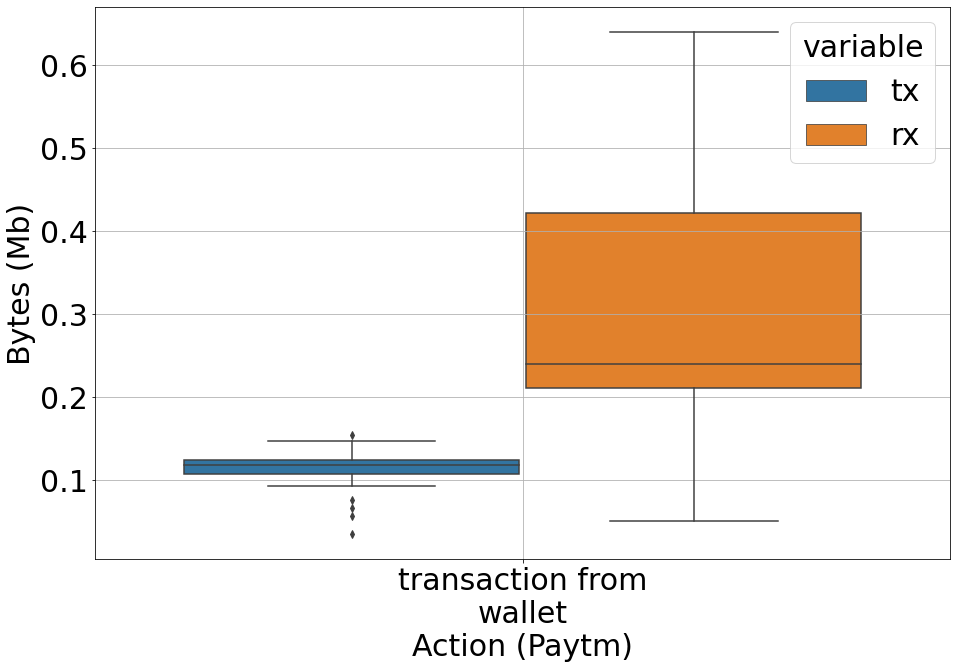

In [ ]:
import seaborn as sns

rowvalues = df_final[df_final['APP'] == 'paytm'].index.values
# print(df_final.iloc[rownum, 34:])
df_final = df_final.fillna(0)
filtered_data_tx = [0] * len(rowvalues)
filtered_data_rx = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
i=0
for rownum in rowvalues:
    tx_values = df_final.iloc[rownum, 2:23].values
    tx_values = tx_values[tx_values != 0]
    rx_values = df_final.iloc[rownum, 24:].values
    rx_values = rx_values[rx_values != 0]
    # print("Median Value TX: ", np.median(tx_values))
    # print("Median Value RX: ", np.median(rx_values))
    # print(i)
    filtered_data_tx[i] = tx_values
    filtered_data_rx[i] = rx_values
    xlabels[i] = df.iloc[rownum, -2]
    i=i+1

j=0
print(len(filtered_data_tx[0]))
print(len(filtered_data_rx[0]))
column_names = ["tx", "rx", "feature"]
df_paytm=pd.DataFrame()
for rownum in rowvalues:
    if j==0:
      xlabel='transaction from\nwallet'
    dic = {'tx': filtered_data_tx[j], 'rx': filtered_data_rx[j],'feature':xlabel} 
    print(dic)
    df_paytm_local = pd.DataFrame(dic)
    df_paytm = df_paytm.append(df_paytm_local, ignore_index = True)
    # print(df_sub)
    j=j+1
df_plot = df_paytm.melt(id_vars='feature', value_vars=["tx", "rx"])
sns.boxplot(x='feature', y='value', hue='', data=df_plot)
plt.grid()
plt.xlabel('Action (Paytm)')
plt.ylabel('Data (MB)')
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/TCP_UDPConnections/Plotsrxtx/'+'paytm.pdf', bbox_inches='tight')

In [ ]:
import seaborn as sns

rowvalues = df_final[df_final['APP'] == 'amazon'].index.values
# print((df_final.iloc[rownum, 2:24]).values)
df_final = df_final.fillna(0)
filtered_data_tx = [0] * len(rowvalues)
filtered_data_rx = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
i=0
for rownum in rowvalues:
    tx_values = df_final.iloc[rownum,2:24].values
    tx_values = tx_values[tx_values != 0]
    rx_values = df_final.iloc[rownum, 25:].values
    rx_values = rx_values[rx_values != 0]
    # print("Median Value TX: ", np.median(tx_values))
    # print("Median Value RX: ", np.median(rx_values))
    # print(i)
    filtered_data_tx[i] = tx_values
    filtered_data_rx[i] = rx_values
    xlabels[i] = df.iloc[rownum, -2]
    i=i+1

j=0
filtered_data_rx[3] = np.append(filtered_data_rx[3], 0)
# print(len(filtered_data_tx[4]))
# print(len(filtered_data_rx[4]))
column_names = ["tx", "rx", "feature"]
df_amazon=pd.DataFrame()
for rownum in rowvalues:
    if j==0:
      xlabel='add to\ncart'
    elif j==1:
      xlabel='go to\ncart'
    elif j==2:
      xlabel='product\nprofile'
    elif j==3:
      xlabel='remove from\ncart'
    else:
      xlabel='search\nresults'
    dic = {'tx': filtered_data_tx[j], 'rx': filtered_data_rx[j],'feature':xlabel} 
    # print(dic)
    df_amazon_local = pd.DataFrame(dic)
    df_amazon = df_amazon.append(df_amazon_local, ignore_index = True)
    # print(df_sub)
    j=j+1
df_plot = df_amazon.melt(id_vars='feature', value_vars=["tx", "rx"])
sns.boxplot(x='feature', y='value', hue='', data=df_plot)
plt.grid()
plt.xlabel('Action (Amazon)')
plt.gca().legend().set_title('')
plt.ylabel('Data (MB)')
plt.ylim(0, 25)
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/TCP_UDPConnections/Plotsrxtx/'+'amazon.pdf', bbox_inches='tight')

IndexError: ignored

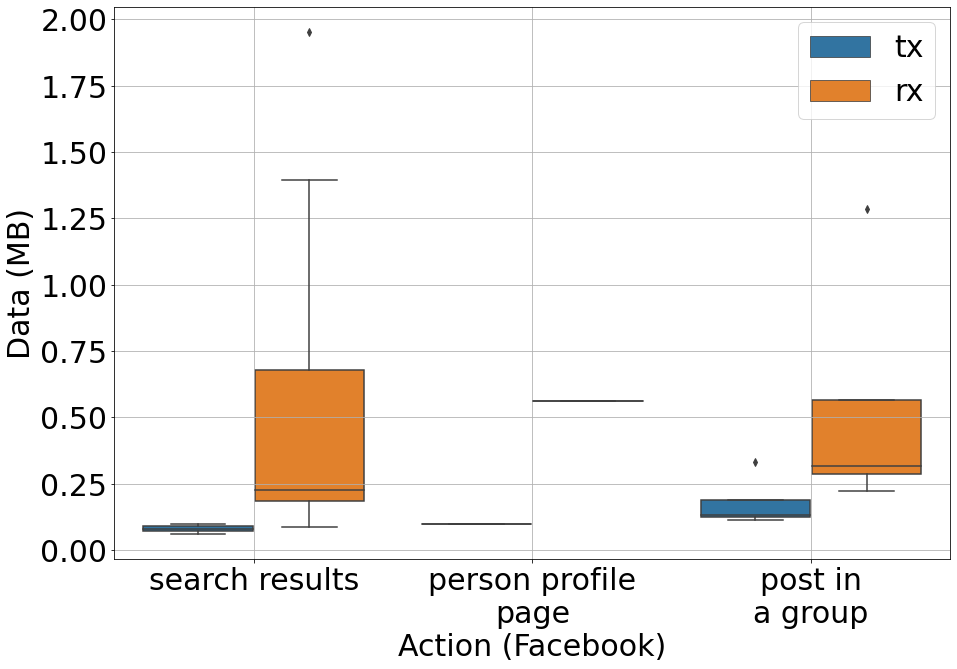

In [ ]:
import seaborn as sns

fb_rows = df_final[df_final['APP'] == 'facebook']
df_fb = pd.DataFrame()
new_row = fb_rows.loc[fb_rows['FEATURE_NAME'] == "search results page"]
df_fb = df_fb.append(new_row)
new_row = fb_rows.loc[fb_rows['FEATURE_NAME'] == "person profile page"]
df_fb = df_fb.append(new_row)
new_row = fb_rows.loc[fb_rows['FEATURE_NAME'] == "post in a group"]
df_fb = df_fb.append(new_row)
df_fb
rowvalues = df_fb.index.values

df_fb = df_fb.fillna(0)

filtered_data_tx = [0] * len(rowvalues)
filtered_data_rx = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
i=0
for rownum in rowvalues:
    # print(df_fb.iloc[i, 2:33])
    tx_values = df_fb.iloc[i, 2:33].values
    tx_values = tx_values[tx_values != 0]
    rx_values = df_fb.iloc[i, 34:].values
    rx_values = rx_values[rx_values != 0]
    # print("Median Value TX: ", np.median(tx_values))
    # print("Median Value RX: ", np.median(rx_values))
    # print(i)
    filtered_data_tx[i] = tx_values
    filtered_data_rx[i] = rx_values
    xlabels[i] = df.iloc[i, -2]
    i=i+1

j=0
column_names = ["tx", "rx", "feature"]
df_facebook=pd.DataFrame()
for rownum in rowvalues:
    if j==0:
      xlabel='search results'
    elif j==1:
      xlabel='person profile\npage'
    else:
      xlabel='post in\na group'
    dic = {'tx': filtered_data_tx[j], 'rx': filtered_data_rx[j],'feature':xlabel} 
    df_facebook_local = pd.DataFrame(dic)
    df_facebook = df_facebook.append(df_facebook_local, ignore_index = True)
    # print(df_sub)
    j=j+1
df_plot = df_facebook.melt(id_vars='feature', value_vars=["tx", "rx"])
sns.boxplot(x='feature', y='value', hue='variable', data=df_plot)
plt.grid()
plt.xlabel('Action (Facebook)')
plt.gca().legend().set_title('')
plt.ylabel('Data (MB)')
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/TCP_UDPConnections/Plotsrxtx/'+'Facebook.pdf', bbox_inches='tight')

In [ ]:
import seaborn as sns

# rowvalues = df_final[df_final['APP'] == 'facebook'].index.values
# df_final = df_final.fillna(0)
# filtered_data_tx = [0] * len(rowvalues)
# filtered_data_rx = [0] * len(rowvalues)
# xlabels = [0] * len(rowvalues)
# i=0


# for rownum in rowvalues:
#     tx_values = df_final.iloc[rownum, 2:33].values
#     tx_values = tx_values[tx_values != 0]
#     rx_values = df_final.iloc[rownum, 34:].values
#     rx_values = rx_values[rx_values != 0]
#     # print("Median Value TX: ", np.median(tx_values))
#     # print("Median Value RX: ", np.median(rx_values))
#     # print(i)
#     filtered_data_tx[i] = tx_values
#     filtered_data_rx[i] = rx_values
#     xlabels[i] = df.iloc[rownum, -2]
#     i=i+1

# j=0
# column_names = ["tx", "rx", "feature"]
# df_facebook=pd.DataFrame()
# for rownum in rowvalues:
#     if j==0:
#       xlabel='person profile\npage'
#     elif j==1:
#       xlabel='post in\na group'
#     else:
#       xlabel='search results'
#     dic = {'tx': filtered_data_tx[j], 'rx': filtered_data_rx[j],'feature':xlabel} 
#     df_facebook_local = pd.DataFrame(dic)
#     df_facebook = df_facebook.append(df_facebook_local, ignore_index = True)
#     # print(df_sub)
#     j=j+1
# df_plot = df_facebook.melt(id_vars='feature', value_vars=["tx", "rx"])
# sns.boxplot(x='feature', y='value', hue='variable', data=df_plot)
# plt.grid()
# plt.xlabel('Action (Facebook)')
# plt.gca().legend().set_title('')
# plt.ylabel('Data (MB)')
# plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/TCP_UDPConnections/Plotsrxtx/'+'Facebook.pdf', bbox_inches='tight')

,APP,FEATURE_NAME,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
3,facebook,search results page,0.094473,0.08303,0.090764,0.078201,0.061926,0.070207,0.059623,0.091143,0.074377,0.066381,0.075782,0.088197,0.096934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,here,1.953398,1.393798,0.679735,1.088933,0.191022,0.411197,0.085541,0.284968,0.185916,0.224626,0.087523,0.117306,0.223085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,facebook,person profile page,0.096530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,here,0.559668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,facebook,post in a group,0.332918,0.12932,0.137333,0.114058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,here,1.283320,0.325165,0.308007,0.222460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


31
31
{'tx': array([0.285957336, 0.186410904, 0.184447289, 0.177703857, 0.172066689,
       0.181827545, 0.18028450000000001, 0.17961120600000002,
       0.17474460600000002, 0.194857597, 0.223555565, 0.174844742,
       0.31956768, 0.238149643, 0.18471813199999998, 0.181149483,
       0.251719475, 0.19047451, 0.245147705, 0.20375061, 0.213866234,
       0.230651855, 0.221182823, 0.236721039, 0.236751556, 0.223536491,
       0.26761055, 0.224079132, 0.24544143699999998, 0.320602417,
       0.229746819], dtype=object), 'rx': array([0.43655777, 0.286596298, 0.268620491, 0.19219017, 0.321026802,
       0.20783424399999997, 0.24687957800000002, 0.19079113, 0.174833298,
       0.128663063, 0.376841545, 0.209823608, 2.371154785, 0.301077843,
       0.224672318, 0.280158043, 0.34528350799999996, 0.278812408,
       0.264803886, 0.44224643700000005, 0.55710125, 0.34996700299999994,
       0.286057472, 0.426153183, 0.39953517899999996, 0.301148415,
       0.45693206799999997, 0.406540871, 0.353

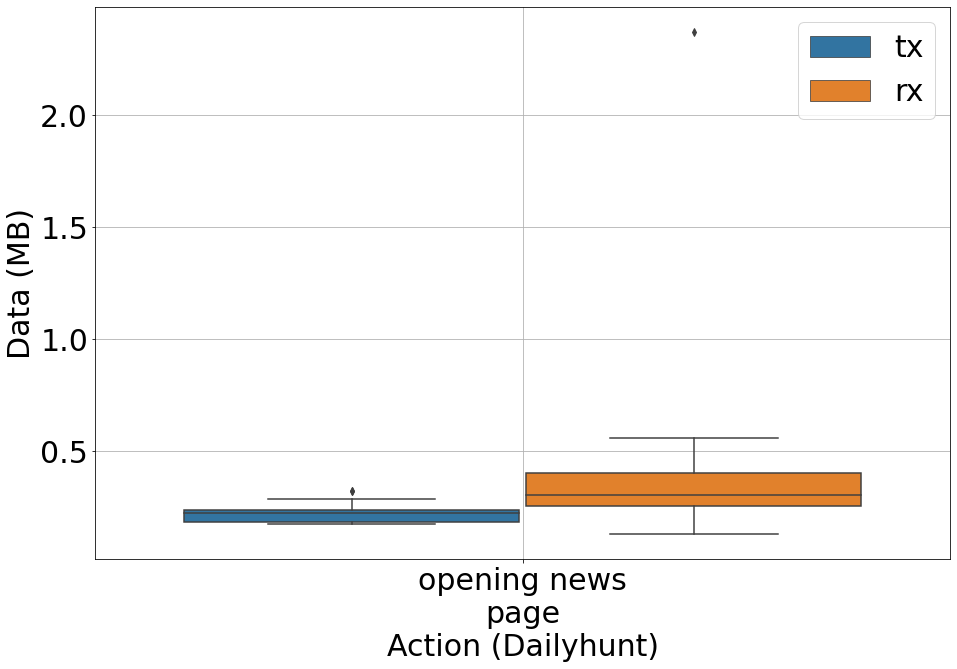

In [ ]:
import seaborn as sns

rowvalues = df_final[df_final['APP'] == 'dailyhunt'].index.values
# print(df_final.iloc[rownum, 34:])
df_final = df_final.fillna(0)
filtered_data_tx = [0] * len(rowvalues)
filtered_data_rx = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
i=0
for rownum in rowvalues:
    tx_values = df_final.iloc[rownum, 2:33].values
    tx_values = tx_values[tx_values != 0]
    rx_values = df_final.iloc[rownum, 34:].values
    rx_values = rx_values[rx_values != 0]
    # print("Median Value TX: ", np.median(tx_values))
    # print("Median Value RX: ", np.median(rx_values))
    # print(i)
    filtered_data_tx[i] = tx_values
    filtered_data_rx[i] = rx_values
    xlabels[i] = df.iloc[rownum, -2]
    i=i+1

j=0
print(len(filtered_data_tx[0]))
print(len(filtered_data_rx[0]))
column_names = ["tx", "rx", "feature"]
df_dailyhunt=pd.DataFrame()
for rownum in rowvalues:
    if j==0:
      xlabel='opening news\npage'
    dic = {'tx': filtered_data_tx[j], 'rx': filtered_data_rx[j],'feature':xlabel} 
    print(dic)
    df_dailyhunt_local = pd.DataFrame(dic)
    df_dailyhunt = df_dailyhunt.append(df_dailyhunt_local, ignore_index = True)
    # print(df_sub)
    j=j+1
df_plot = df_dailyhunt.melt(id_vars='feature', value_vars=["tx", "rx"])
sns.boxplot(x='feature', y='value', hue='variable', data=df_plot)
plt.grid()
plt.xlabel('Action (Dailyhunt)')
plt.gca().legend().set_title('')
plt.ylabel('Data (MB)')
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/TCP_UDPConnections/Plotsrxtx/'+'dailyhunt.pdf', bbox_inches='tight')

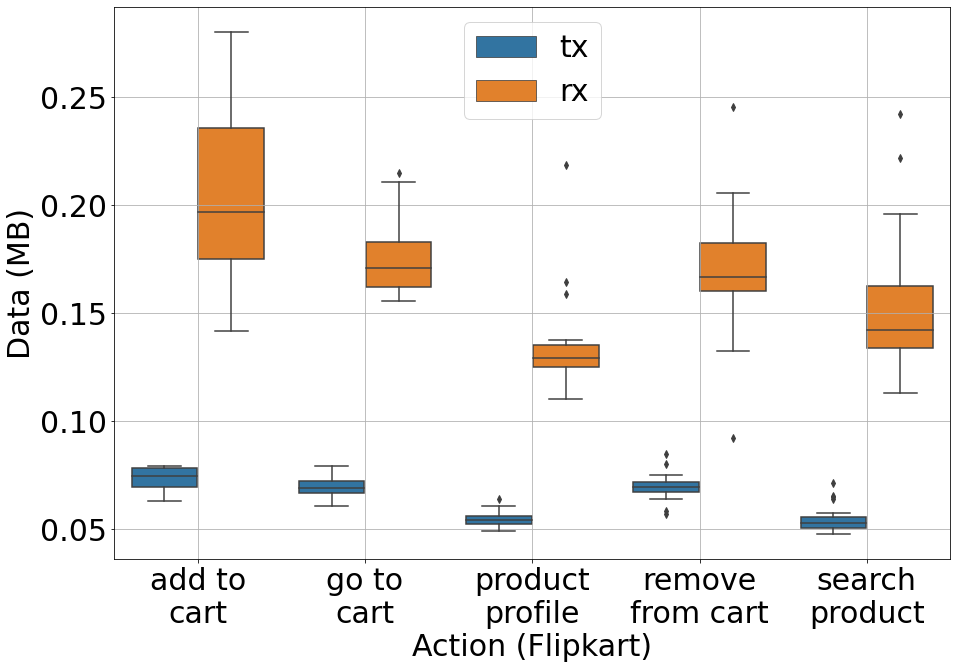

In [ ]:
import seaborn as sns

rowvalues = df_final[df_final['APP'] == 'flipkart'].index.values
df_final = df_final.fillna(0)
filtered_data_tx = [0] * len(rowvalues)
filtered_data_rx = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
i=0
for rownum in rowvalues:
    tx_values = df_final.iloc[rownum, 2:33].values
    tx_values = tx_values[tx_values != 0]
    rx_values = df_final.iloc[rownum, 34:].values
    rx_values = rx_values[rx_values != 0]
    # print("Median Value TX: ", np.median(tx_values))
    # print("Median Value RX: ", np.median(rx_values))
    # print(i)
    filtered_data_tx[i] = tx_values
    filtered_data_rx[i] = rx_values
    xlabels[i] = df.iloc[rownum, -2]
    i=i+1

j=0
column_names = ["tx", "rx", "feature"]
df_flp=pd.DataFrame()
for rownum in rowvalues:
    if j==0:
      xlabel='add to\ncart'
    elif j==1:
      xlabel='go to\ncart'
    elif j==2:
      xlabel='product\nprofile'
    elif j==3:
      xlabel='remove\nfrom cart'
    else:
      xlabel='search\nproduct'      
    dic = {'tx': filtered_data_tx[j], 'rx': filtered_data_rx[j],'feature':xlabel} 
    df_flp_local = pd.DataFrame(dic)
    df_flp = df_flp.append(df_flp_local, ignore_index = True)
    # print(df_sub)
    j=j+1
df_plot = df_flp.melt(id_vars='feature', value_vars=["tx", "rx"])
sns.boxplot(x='feature', y='value', hue='variable', data=df_plot)
plt.grid()
plt.xlabel('Action (Flipkart)')
plt.gca().legend().set_title('')
plt.ylabel('Data (MB)')
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/TCP_UDPConnections/Plotsrxtx/'+'flipkart.pdf', bbox_inches='tight')

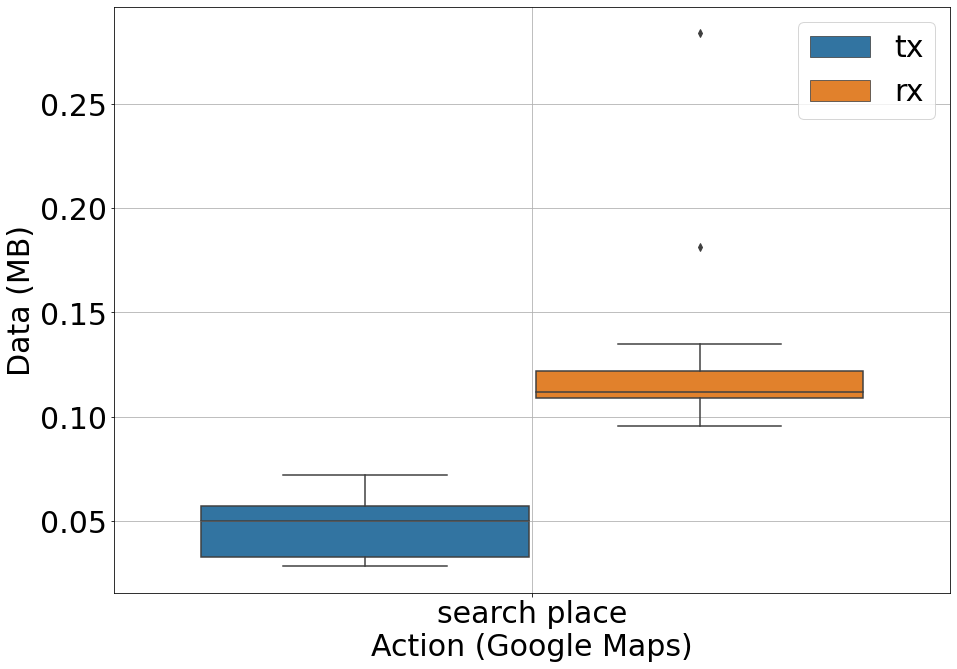

In [ ]:
rowvalues = df_final[df_final['APP'] == 'googlemaps'].index.values
df_final = df_final.fillna(0)
filtered_data_tx = [0] * len(rowvalues)
filtered_data_rx = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
i=0
for rownum in rowvalues:
    tx_values = df_final.iloc[rownum, 2:33].values
    tx_values = tx_values[tx_values != 0]
    rx_values = df_final.iloc[rownum, 34:].values
    rx_values = rx_values[rx_values != 0]
    # print("Median Value TX: ", np.median(tx_values))
    # print("Median Value RX: ", np.median(rx_values))
    # print(i)
    filtered_data_tx[i] = tx_values
    filtered_data_rx[i] = rx_values
    i=i+1

j=0
column_names = ["tx", "rx", "feature"]
df_gmaps=pd.DataFrame()
for rownum in rowvalues:
    xlabel='search place'      
    dic = {'tx': filtered_data_tx[j], 'rx': filtered_data_rx[j],'feature':xlabel} 
    df_gmaps_local = pd.DataFrame(dic)
    df_gmaps = df_gmaps.append(df_gmaps_local, ignore_index = True)
    # print(df_gmaps)
    j=j+1
df_plot = df_gmaps.melt(id_vars='feature', value_vars=["tx", "rx"])
sns.boxplot(x='feature', y='value', hue='variable', data=df_plot)
plt.grid()
plt.xlabel('Action (Google Maps)')
plt.gca().legend().set_title('')
plt.ylabel('Data (MB)')
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/TCP_UDPConnections/Plotsrxtx/'+'GMaps.pdf', bbox_inches='tight')

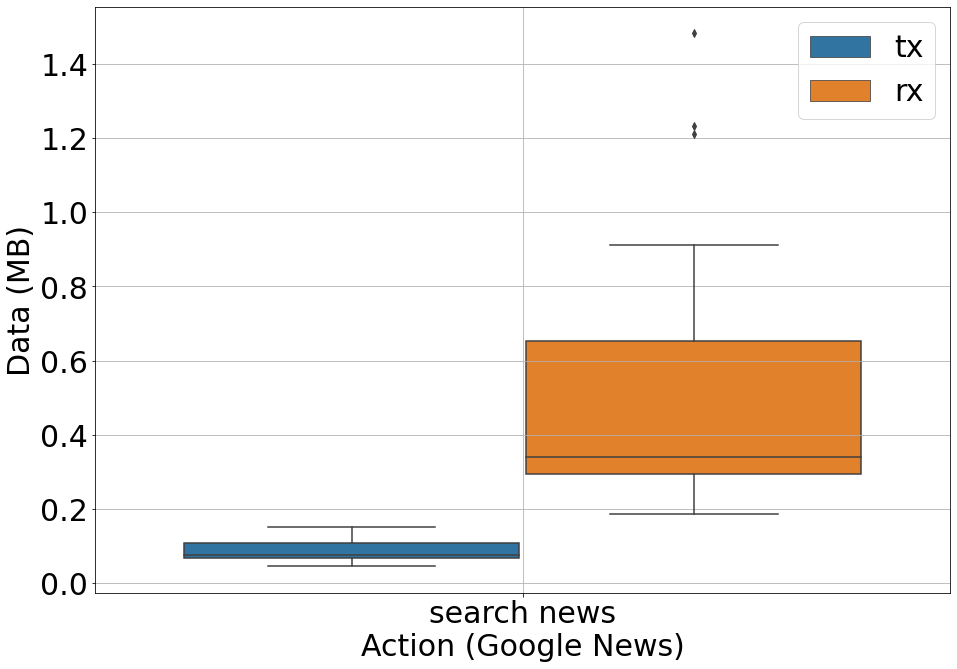

In [ ]:
rowvalues = df_final[df_final['APP'] == 'googlenews'].index.values
df_final = df_final.fillna(0)
filtered_data_tx = [0] * len(rowvalues)
filtered_data_rx = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
i=0
for rownum in rowvalues:
    tx_values = df_final.iloc[rownum, 2:33].values
    tx_values = tx_values[tx_values != 0]
    rx_values = df_final.iloc[rownum, 34:].values
    rx_values = rx_values[rx_values != 0]
    # print("Median Value TX: ", np.median(tx_values))
    # print("Median Value RX: ", np.median(rx_values))
    # print(i)
    filtered_data_tx[i] = tx_values
    filtered_data_rx[i] = rx_values
    i=i+1
# print(filtered_data_tx)
j=0
column_names = ["tx", "rx", "feature"]
df_gnews=pd.DataFrame()
for rownum in rowvalues:
    xlabel='search news'      
    dic = {'tx': filtered_data_tx[j], 'rx': filtered_data_rx[j],'feature':xlabel} 
    df_gnews_local = pd.DataFrame(dic)
    # print(df_gnews_local)
    df_gnews = df_gnews.append(df_gnews_local, ignore_index = True)
    # print(df_gnews)
    j=j+1
df_plot = df_gnews.melt(id_vars='feature', value_vars=["tx", "rx"])
sns.boxplot(x='feature', y='value', hue='variable', data=df_plot)
plt.grid()
plt.xlabel('Action (Google News)')
plt.gca().legend().set_title('')
plt.ylabel('Data (MB)')
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/TCP_UDPConnections/Plotsrxtx/'+'GNews.pdf', bbox_inches='tight')

0     0.286596
1     0.000000
2     0.325165
3     1.393798
4     0.242203
5     0.179338
6     0.124432
7     0.196138
8     0.195869
9     0.122392
10    0.332536
11    2.390371
12    6.182667
13    0.202096
14    0.393066
15    0.174124
16    0.230417
17    0.079764
18    0.013309
19    0.605405
20    1.582418
21    1.764442
Name: 33, dtype: float64


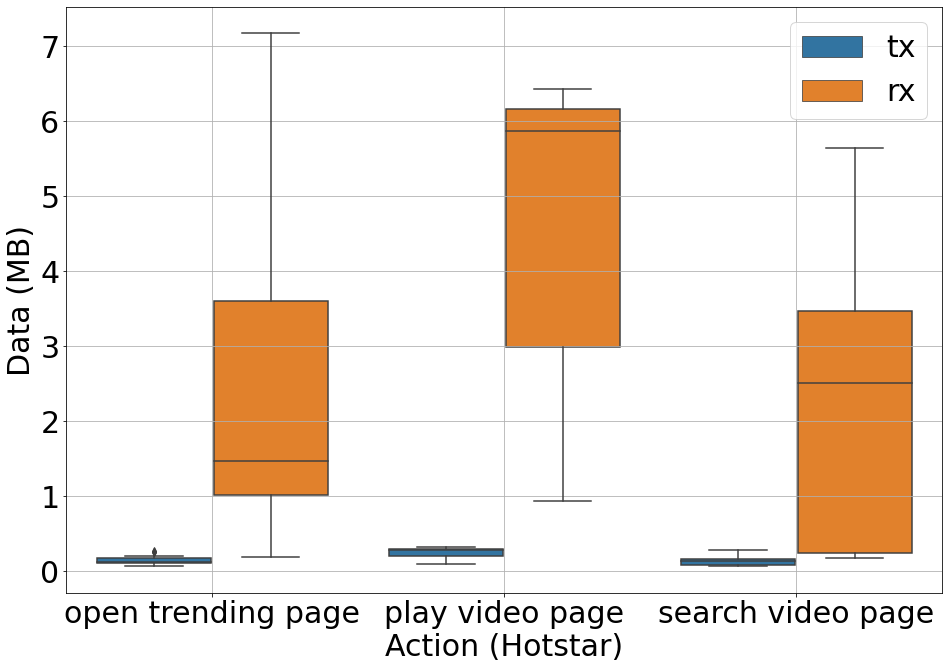

In [ ]:
import seaborn as sns
rowvalues = df_final[df_final['APP'] == 'hotstar'].index.values
df_final = df_final.fillna(0)
filtered_data_tx = [0] * len(rowvalues)
filtered_data_rx = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
i=0
print(df_final[33])
for rownum in rowvalues:
    tx_values = df_final.iloc[rownum, 2:33].values
    tx_values = tx_values[tx_values != 0]
    rx_values = df_final.iloc[rownum, 34:].values
    rx_values = rx_values[rx_values != 0]
    # print("Median Value TX: ", np.median(tx_values))
    # print("Median Value RX: ", np.median(rx_values))
    # print(i)
    filtered_data_tx[i] = tx_values
    filtered_data_rx[i] = rx_values
    i=i+1
# print(filtered_data_tx)
j=0
column_names = ["tx", "rx", "feature"]
df_hotstar=pd.DataFrame()
for rownum in rowvalues:
    if j==0:
      xlabel='open trending page'
    elif j==1:
      xlabel='play video page'
    else:
      xlabel='search video page'          
    dic = {'tx': filtered_data_tx[j], 'rx': filtered_data_rx[j],'feature':xlabel} 
    df_hotstar_local = pd.DataFrame(dic)
    # print(df_hotstar_local)
    df_hotstar = df_hotstar.append(df_hotstar_local, ignore_index = True)
    # print(df_hotstar)
    j=j+1
df_plot = df_hotstar.melt(id_vars='feature', value_vars=["tx", "rx"])
sns.boxplot(x='feature', y='value', hue='variable', data=df_plot)
plt.grid()
plt.xlabel('Action (Hotstar)')
plt.gca().legend().set_title('')
plt.ylabel('Data (MB)')
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/TCP_UDPConnections/Plotsrxtx/'+'Hotstar.pdf', bbox_inches='tight')

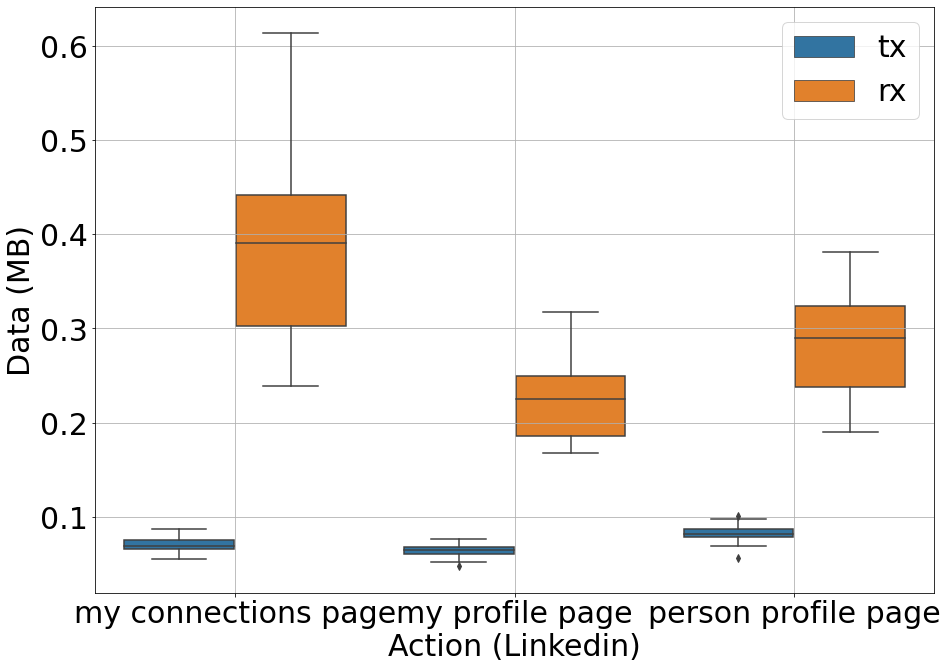

In [ ]:
rowvalues = df_final[df_final['APP'] == 'linkedin'].index.values
df_final = df_final.fillna(0)
filtered_data_tx = [0] * len(rowvalues)
filtered_data_rx = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
i=0
for rownum in rowvalues:
    tx_values = df_final.iloc[rownum, 2:33].values
    tx_values = tx_values[tx_values != 0]
    rx_values = df_final.iloc[rownum, 34:].values
    rx_values = rx_values[rx_values != 0]
    # print("Median Value TX: ", np.median(tx_values))
    # print("Median Value RX: ", np.median(rx_values))
    # print(i)
    filtered_data_tx[i] = tx_values
    filtered_data_rx[i] = rx_values
    i=i+1
# print(filtered_data_tx)
j=0
column_names = ["tx", "rx", "feature"]
df_linkedin=pd.DataFrame()
for rownum in rowvalues:
    if j==0:
      xlabel='my connections page'
    elif j==1:
      xlabel='my profile page'
    else:
      xlabel='person profile page'          
    dic = {'tx': filtered_data_tx[j], 'rx': filtered_data_rx[j],'feature':xlabel} 
    df_linkedin_local = pd.DataFrame(dic)
    # print(df_linkedin_local)
    df_linkedin = df_linkedin.append(df_linkedin_local, ignore_index = True)
    # print(df_linkedin)
    j=j+1
df_plot = df_linkedin.melt(id_vars='feature', value_vars=["tx", "rx"])
sns.boxplot(x='feature', y='value', hue='variable', data=df_plot)
plt.grid()
plt.xlabel('Action (Linkedin)')
plt.gca().legend().set_title('')
plt.ylabel('Data (MB)')
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/TCP_UDPConnections/Plotsrxtx/'+'Linkedin.pdf', bbox_inches='tight')

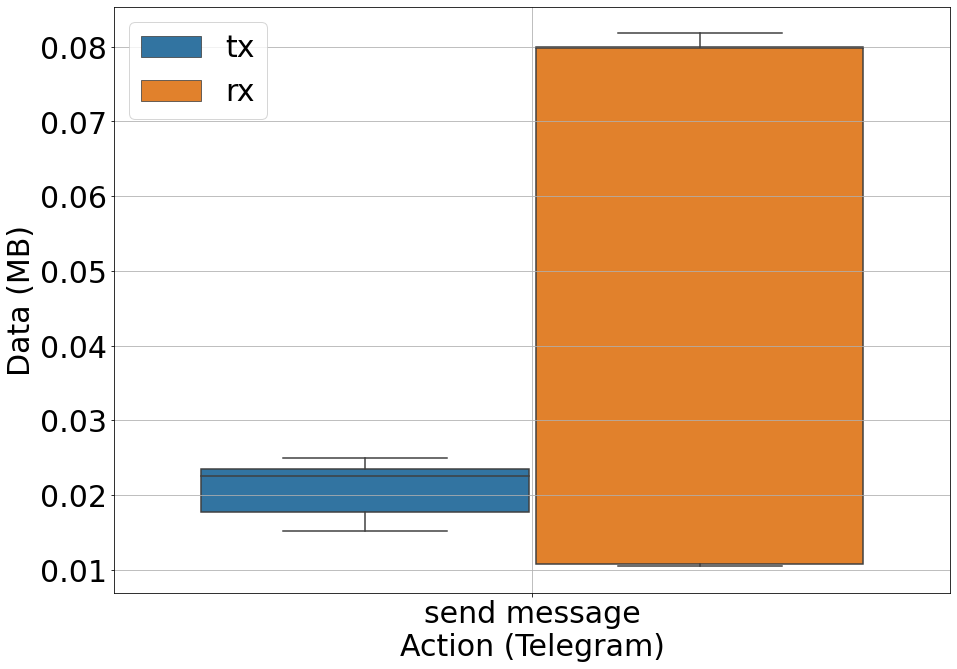

<Figure size 1008x720 with 0 Axes>

In [ ]:
rowvalues = df_final[df_final['APP'] == 'telegram'].index.values
df_final = df_final.fillna(0)
filtered_data_tx = [0] * len(rowvalues)
filtered_data_rx = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
i=0
for rownum in rowvalues:
    tx_values = df_final.iloc[rownum, 2:33].values
    tx_values = tx_values[tx_values != 0]
    rx_values = df_final.iloc[rownum, 34:].values
    rx_values = rx_values[rx_values != 0]
    # print("Median Value TX: ", np.median(tx_values))
    # print("Median Value RX: ", np.median(rx_values))
    # print(i)
    filtered_data_tx[i] = tx_values
    filtered_data_rx[i] = rx_values
    i=i+1
# print(filtered_data_tx)
j=0
column_names = ["tx", "rx", "feature"]
df_telegram=pd.DataFrame()
for rownum in rowvalues:
    if j==0:
      xlabel='send message'        
    dic = {'tx': filtered_data_tx[j], 'rx': filtered_data_rx[j],'feature':xlabel} 
    df_telegram_local = pd.DataFrame(dic)
    # print(df_telegram_local)
    df_telegram = df_telegram.append(df_telegram_local, ignore_index = True)
    # print(df_telegram)
    j=j+1
df_plot = df_telegram.melt(id_vars='feature', value_vars=["tx", "rx"])
sns.boxplot(x='feature', y='value', hue='variable', data=df_plot)
plt.grid()
plt.xlabel('Action (Telegram)')
plt.gca().legend().set_title('')
plt.ylabel('Data (MB)')
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/TCP_UDPConnections/Plotsrxtx/'+'Telegram.pdf', bbox_inches='tight')

         APP     FEATURE_NAME         0         1  ...   59   60   61   62
18  whatsapp  sending message  0.005817  0.006838  ...  0.0  0.0  0.0  0.0

[1 rows x 65 columns]
[0.0058174130000000004 0.006837845 0.0042772290000000004 0.004015923
 0.004359245 0.003723145 0.004408836 0.004546165 0.004706383 0.00398159
 0.00391674 0.006362915 0.005010605 0.0052652359999999995 0.003388405
 0.007888794000000001 0.00518322 0.0048351290000000005
 0.0043888090000000005 0.004990578 0.0050277709999999995
 0.004455565999999999 0.004717827 0.004347801 0.0046911240000000005
 0.00483799 0.004318237]
[0.009943961999999999 0.013309478999999999 0.007076263
 0.007045745999999999 0.008999825 0.008155823000000001 0.009048462
 0.009033203 0.009204865 0.008283615 0.011352538999999998
 0.009680748000000001 0.009596825 0.007819176 0.01693821
 0.010289191999999999 0.009123802 0.008852005 0.009893417 0.008288383
 0.008989334 0.009405136 0.009037018 0.009595871 0.009450911999999999
 0.00876236 0]


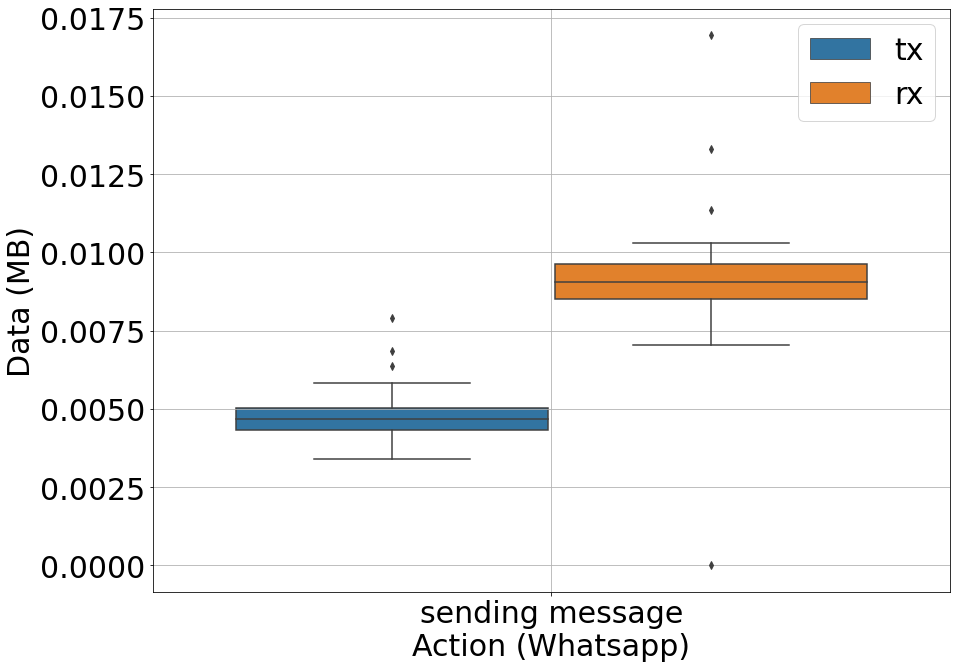

In [ ]:
import seaborn as sns
rowvalues = df_final[df_final['APP'] == 'whatsapp'].index.values
df_final = df_final.fillna(0)
filtered_data_tx = [0] * len(rowvalues)
filtered_data_rx = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
i=0
print(df_final[df_final['APP']=='whatsapp'])
for rownum in rowvalues:
    tx_values = df_final.iloc[rownum, 2:33].values
    tx_values = tx_values[tx_values != 0]
    rx_values = df_final.iloc[rownum, 34:].values
    rx_values = rx_values[rx_values != 0]
    # print("Median Value TX: ", np.median(tx_values))
    # print("Median Value RX: ", np.median(rx_values))
    # print(i)
    filtered_data_tx[i] = tx_values
    filtered_data_rx[i] = rx_values
    i=i+1
filtered_data_rx[0] = np.append(filtered_data_rx[0], 0)
print((filtered_data_tx[0]))
print((filtered_data_rx[0]))
j=0
column_names = ["tx", "rx", "feature"]
df_whatsapp=pd.DataFrame()
for rownum in rowvalues:
    if j==0:
      xlabel='sending message'        
    dic = {'tx': filtered_data_tx[j], 'rx': filtered_data_rx[j],'feature':xlabel} 
    df_whatsapp_local = pd.DataFrame(dic)
    # print(df_whatsapp_local)
    df_whatsapp = df_whatsapp.append(df_whatsapp_local, ignore_index = True)
    # print(df_whatsapp)
    j=j+1
df_plot = df_whatsapp.melt(id_vars='feature', value_vars=["tx", "rx"])
sns.boxplot(x='feature', y='value', hue='variable', data=df_plot)
plt.grid()
plt.xlabel('Action (Whatsapp)')
plt.gca().legend().set_title('')
plt.ylabel('Data (MB)')
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/TCP_UDPConnections/Plotsrxtx/'+'Whatsapp.pdf', bbox_inches='tight')

[19 20 21]
Median Value TX:  0.095051765
Median Value RX:  0.605404854
Median Value TX:  0.1877202985
Median Value RX:  1.8678503035
Median Value TX:  0.140252113
Median Value RX:  1.433403969


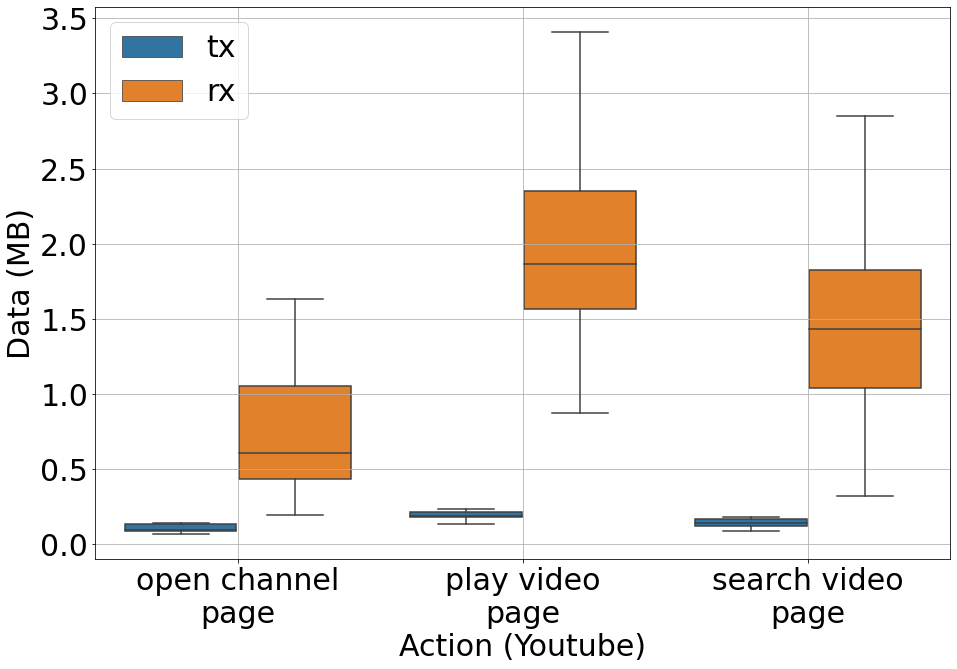

In [ ]:
import seaborn as sns

rowvalues = df_final[df_final['APP'] == 'youtube'].index.values
print(rowvalues)
df_final = df_final.fillna(0)
filtered_data_tx = [0] * 3
filtered_data_rx = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
i=0
for rownum in rowvalues:
    tx_values = df_final.iloc[rownum, 2:33].values
    tx_values = tx_values[tx_values != 0]
    rx_values = df_final.iloc[rownum, 34:].values
    rx_values = rx_values[rx_values != 0]
    print("Median Value TX: ", np.median(tx_values))
    print("Median Value RX: ", np.median(rx_values))
    # print(i)
    filtered_data_tx[i] = tx_values
    filtered_data_rx[i] = rx_values
    xlabels[i] = df.iloc[rownum, -2]
    i=i+1

j=0
column_names = ["tx", "rx", "feature"]
df_sub=pd.DataFrame()
for rownum in rowvalues:
    if j==0:
      xlabel='open channel\npage'
    elif j==1:
      xlabel='play video\npage'
    else:
      xlabel='search video\npage'
    dic = {'tx': filtered_data_tx[j], 'rx': filtered_data_rx[j],'feature':xlabel} 
    df_sub_local = pd.DataFrame(dic)
    df_sub = df_sub.append(df_sub_local, ignore_index = True)
    # print(df_sub)
    j=j+1
df_plot = df_sub.melt(id_vars='feature', value_vars=["tx", "rx"])
sns.boxplot(x='feature', y='value', hue='variable', data=df_plot)
plt.grid()
plt.xlabel('Action (Youtube)')
plt.gca().legend().set_title('')
plt.ylabel('Data (MB)')
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/TCP_UDPConnections/Plotsrxtx/'+'Youtube.pdf', bbox_inches='tight')